In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sys
import molecules as mc
import forces as fc
from scipy.integrate import quad



In [5]:
d0 = 200 # mean diameter
beta = 0.38 #std of distribution 

# takes diameter as input, returns probability?
def dist(d):
  return (1/(np.sqrt(2*np.pi)*beta*d)) * np.exp(-(np.log(d/d0)**2)/(2*beta**2))

def cdf(d):
  return quad(dist, a =-0.0000000000001,b = d, args=())[0]


In [57]:
from scipy import integrate, optimize

In [98]:
def sample_radius():
  tg_val = np.random.rand() # get random unifrom [0,1] value
  eq = lambda x: integrate.quad(dist, -0.0000000000001, x)[0] - tg_val
  solution = optimize.fsolve(eq, 200) # 200 = mean

  return solution[0] / 2 #solution is diameter, we want radius

def get_n_radii(N = 1):
  return np.array([sample_radius() for _ in range(N)])

In [96]:
# target_integral_value = 0.01

# eq = lambda x: integrate.quad(dist, -0.0000000000001, x)[0] - target_integral_value

# initial_guess = 200

# solution = optimize.fsolve(eq, initial_guess)

In [101]:
N = 10000

values = get_n_radii(N)

print(np.mean(values))

107.41468304809206


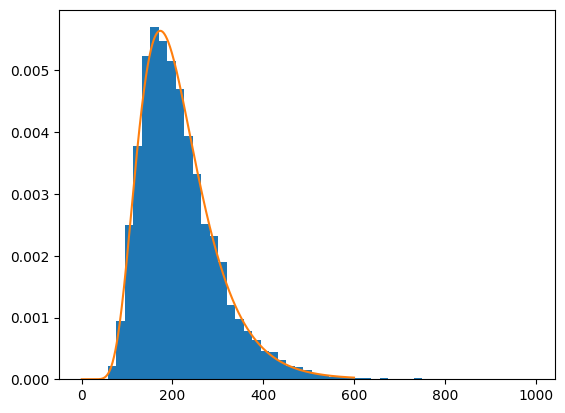

In [102]:
x = np.linspace(0.1,600, 1000)
res = [dist(i) for i in x]
plt.figure()
plt.hist(values * 2,bins = 50, density = True)
plt.plot(x,res)
plt.show()

In [50]:
x_values = np.linspace(50,500,10000)

pdf_values = dist(x_values)
pdf_values/= pdf_values.sum() #


print(sum(pdf_values))



0.9999999999999989


In [46]:
samples = np.random.choice(x_values, size = 10000, p = pdf_values)

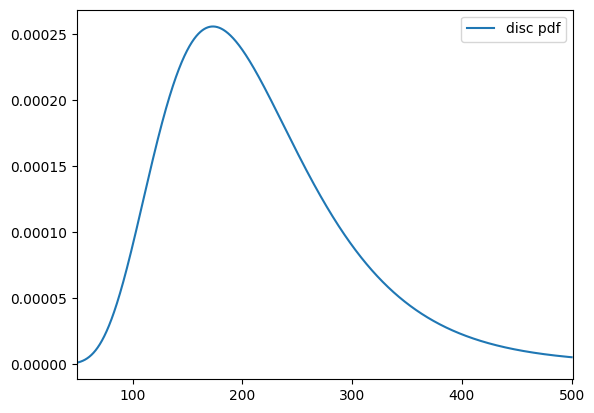

In [52]:
plt.figure()
plt.plot(x_values, pdf_values, label = "disc pdf")
#plt.hist(samples, bins = 50, density = True, label = "sampled values")
#plt.plot(x_values, dist(x_values))
plt.xlim([49,501])
plt.legend()
plt.show()

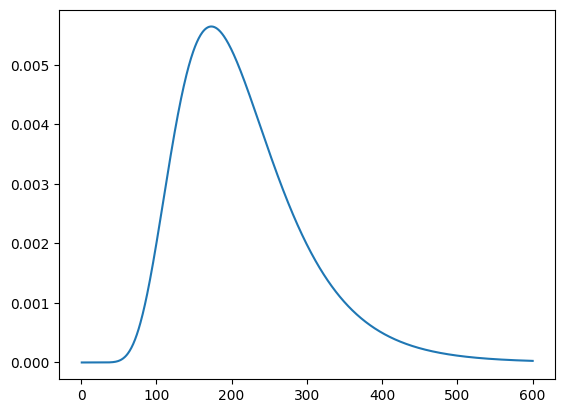

In [53]:
ds = np.linspace(1,600,1000)
res = [dist(d) for d in ds]
#cum = [cdf(d) for d in ds]
plt.figure()
plt.plot(ds,res, label = "Actual pdf")
#plt.plot(ds, log_norm_distribution.pdf(ds), label = "lognorm pdf")
#plt.hist(rvs,bins = 100)
plt.show()
# print(max(res))
# print(ds[res.index(max(res))])
# print(quad(dist, a =-0.00000001, b =100, args=()))

In [9]:
print(np.log(np.exp(1)))

1.0


In [10]:
def force(x, cut_off = 0.5):
  if x > cut_off:
    return - 9*np.exp(-0.5*x)
  else:
    return 10

In [11]:
import scipy.constants as consts
EPS0 = consts.epsilon_0#electric permittivity of vacuum
EPS =  72#dielectric constant of the solvent, estimated to be in range [70,75] so far based on papers
PHII = 8 #electrostaticpotential at the surface of particle i, generalized to be 8 based on papers
#KAPPA = #inverse Debye length
TEMPERATURE = 309.15 #kelvin = 36C
I = 0.08 #Ionic strength, defined as (M,mol L)

#steric repulstion constats:
sigma = 0.013 #grafting density
H = 7 #width of the polyelectrolyte brush in nm


def steric_cust(m1,m2):
  h = (mc.dist(m1,m2)-m1.radius-m2.radius)

  if (h > 2*H):
    return 0
  
  a_eff = ((1/m1.radius) + (1/m2.radius)) ** (-1)                # small positive value
  fst_nominator = 16 * np.pi * a_eff * H * H * (sigma ** (3/2))  
  fst_denominator = 35 # * SIGMA

  y = (h / (2*H))

  snd = 28 * (y**(-1/4) - 1)
  trd = (20/11) * (1 - y**(11/4))
  fth = 12 * (y - 1)

  U_st = (fst_nominator / fst_denominator) * (snd + trd + fth)

  return U_st

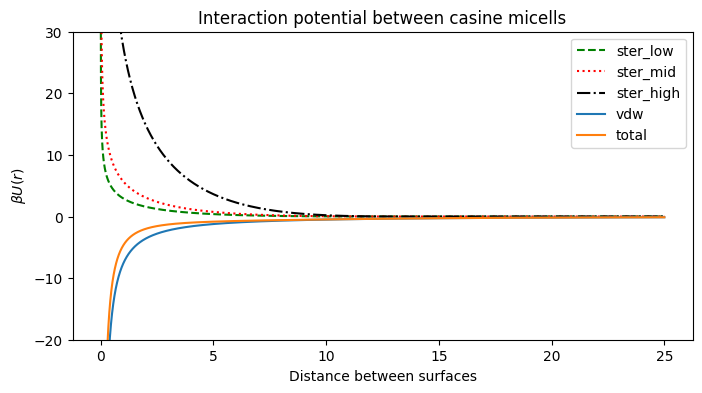

[161.43262043977867, 67.77754129163151, 56.23830950278127, 50.26796585298837, 46.36087904015732, 43.508744259364136, 41.28910449447791, 39.487230285283715, 37.97998258881622, 36.69061554398065]
[313.19843682543717, 131.4964715717379, 109.1089928292833, 97.52581779729918, 89.9456058241159, 84.41212595786347, 80.10576146483784, 76.60991171564653, 73.68567235710586, 71.1841473131797]
[1.0000000e-05 2.6000240e-04 5.1000480e-04 7.6000720e-04 1.0100096e-03
 1.2600120e-03 1.5100144e-03 1.7600168e-03 2.0100192e-03 2.2600216e-03]


In [12]:
dists = np.linspace(0.00001,25,100000)
vdws = []
# ess = []
sters1 = []
sters2 = []
sters3 = []


for i in dists:
  radius = 500
  dist_between = 100 + 100 + i#2*radius + i
  tm1 = mc.Molecule(np.array([0.0,0.0,0.0]),100)
  tm2 = mc.Molecule(np.array([dist_between,0.0,0.0]),100)
  vdws.append(fc.vdw(tm1,tm2))
  #ess.append(fc.elec_rep(tm1,tm2))
  #ess.append(fc.elec_repv2(tm1,tm2))
  #ess.append(fc.elec_rep3(tm1,tm2))
  sigma = 0.006 * 0.225
  sters1.append(steric_cust(tm1,tm2))

  sigma = 0.006 * 0.35
  sters2.append(steric_cust(tm1,tm2))

  sigma = 0.006
  sters3.append(steric_cust(tm1,tm2))

#print(dists)
#print(vdws)
#print(ess)
#print(sters)

#total_fs = [v + e + s for (v,e,s) in zip(vdws,ess,sters)]


plt.figure(figsize=(8,4))

plt.plot(dists, sters1, c="green", label = "ster_low", linestyle='--')
plt.plot(dists,sters2,c="red",label="ster_mid",linestyle=":")
plt.plot(dists,sters3,color = "black", label="ster_high",linestyle="-.")
total_fs = [v + e for (v,e) in zip(vdws,sters1)]
plt.plot(dists,vdws, label = "vdw")
plt.plot(dists,total_fs, label = "total")
#plt.plot(dists,total_fs,color = "blue", label="$U_{tot}$")

plt.ylim((-20,30))
plt.title("Interaction potential between casine micells")
plt.xlabel("Distance between surfaces")
plt.ylabel(r"$\beta U(r)$")
plt.legend()
plt.show()
print(sters1[:10])
print(sters2[:10])
print(dists[:10])

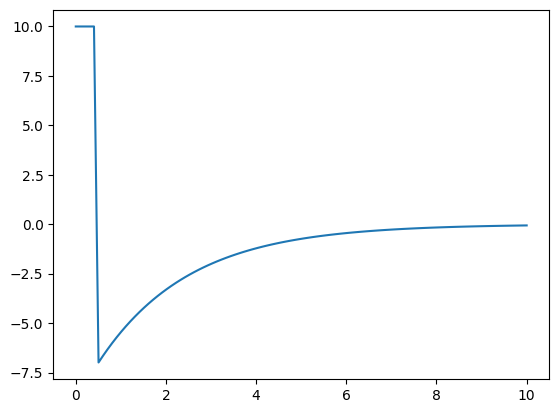

In [13]:
x = np.linspace(0,10,100)
res = [force(elm, 0.5) for elm in x]
#print(res[:10])
plt.figure()
#plt.yscale("log")
plt.plot(x,res)
plt.show()

In [14]:
lst = [-1,2,5,9]
print(any(lst > 0))

TypeError: '>' not supported between instances of 'list' and 'int'

In [ ]:
8 if False else 4

4

In [ ]:
test_pos = np.array([3,6,5])
maxs = np.array([4,5,6])
mins = [0,0,0]

print(np.any((test_pos > maxs)))

True


In [ ]:
np.any([1,3,4] > maxs)

False

In [ ]:
a = np.array([1,None,3])
a = None

if np.all(a) != None:
  print("yes")
else:
  print("False")

False
